# ⚠️ The null space

In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import starry

starry.config.lazy = False

Pre-computing some matrices... Done.
Compiling `render`... Done.


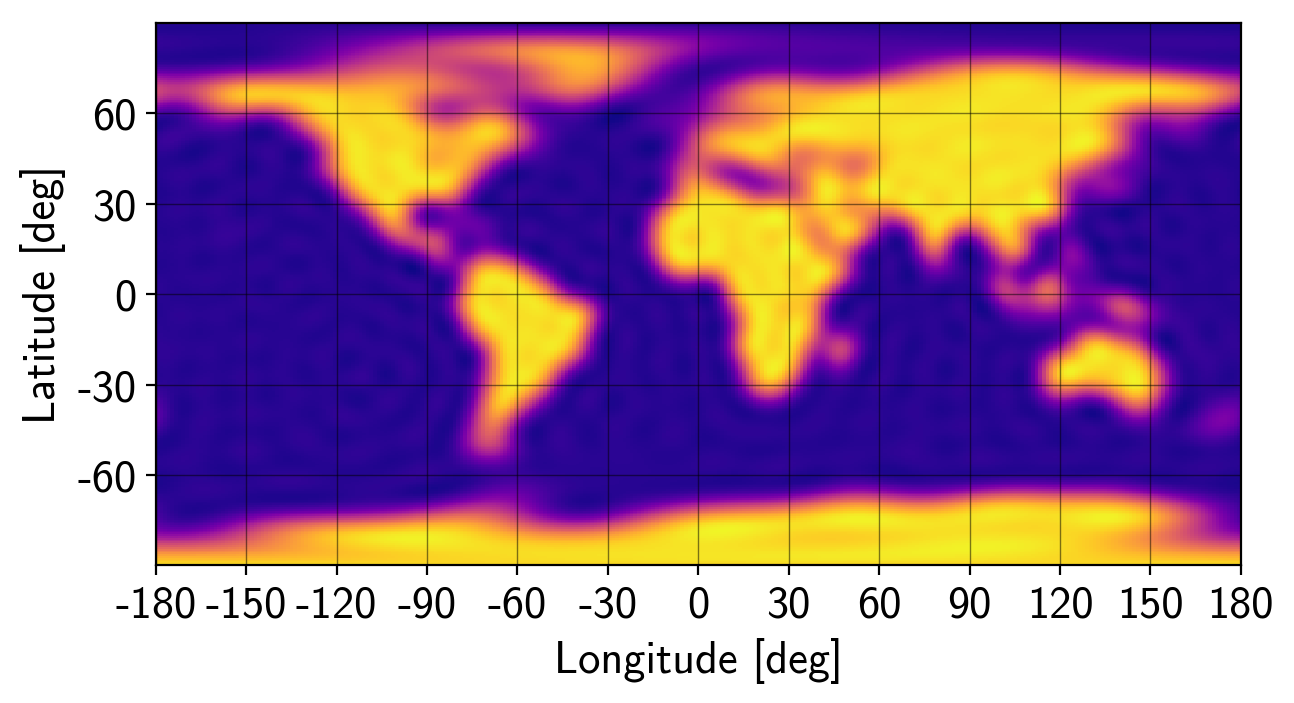

In [27]:
map1 = starry.Map(30)
map1.load("earth", sigma=0.05)
map1.show(projection="rect")

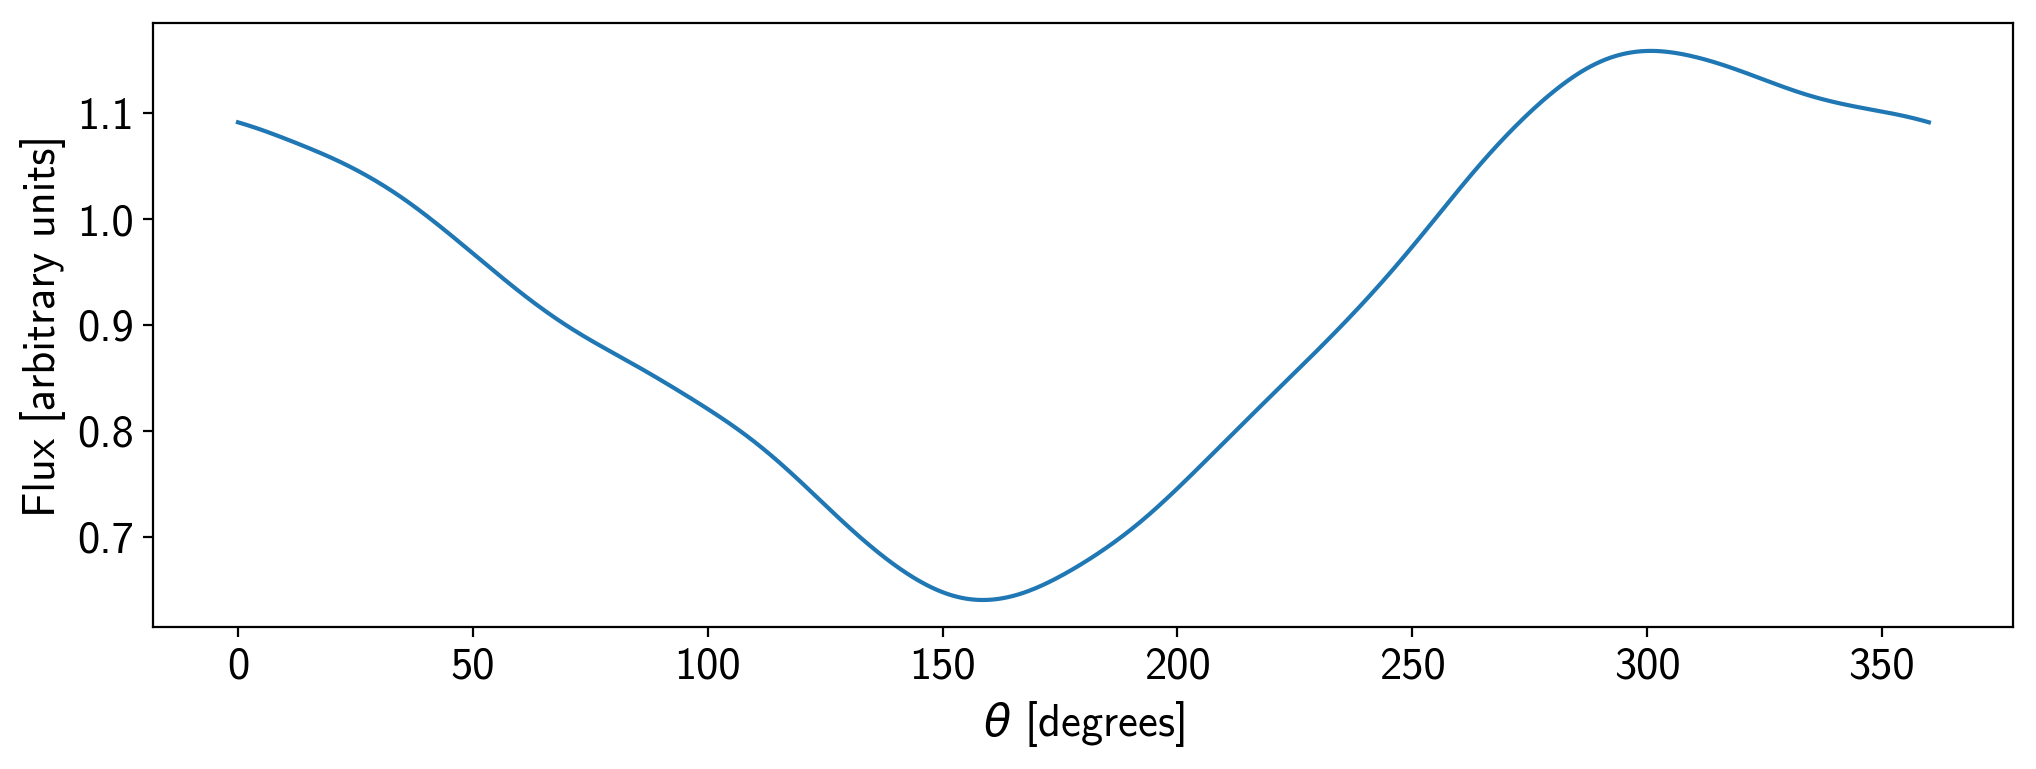

In [28]:
theta = np.linspace(0, 360, 1000)
flux1 = map.flux(theta=theta)
plt.plot(theta, flux1)
plt.xlabel(r"$\theta$ [degrees]")
plt.ylabel("Flux [arbitrary units]");

Let's create a new map of the Earth:

In [29]:
map2 = starry.Map(30)
map2.load("earth", sigma=0.05)

Pre-computing some matrices... Done.


This time, let's zero out all coefficients corresponding to odd degrees above 2...

In [30]:
for l in range(3, map2.ydeg + 1, 2):
    map2[l, :] = 0

... as well as all coefficients corresponding to negative values of `m`:

In [31]:
for l in range(1, map2.ydeg + 1):
    map2[l, -l:0] = 0

Compiling `render`... Done.


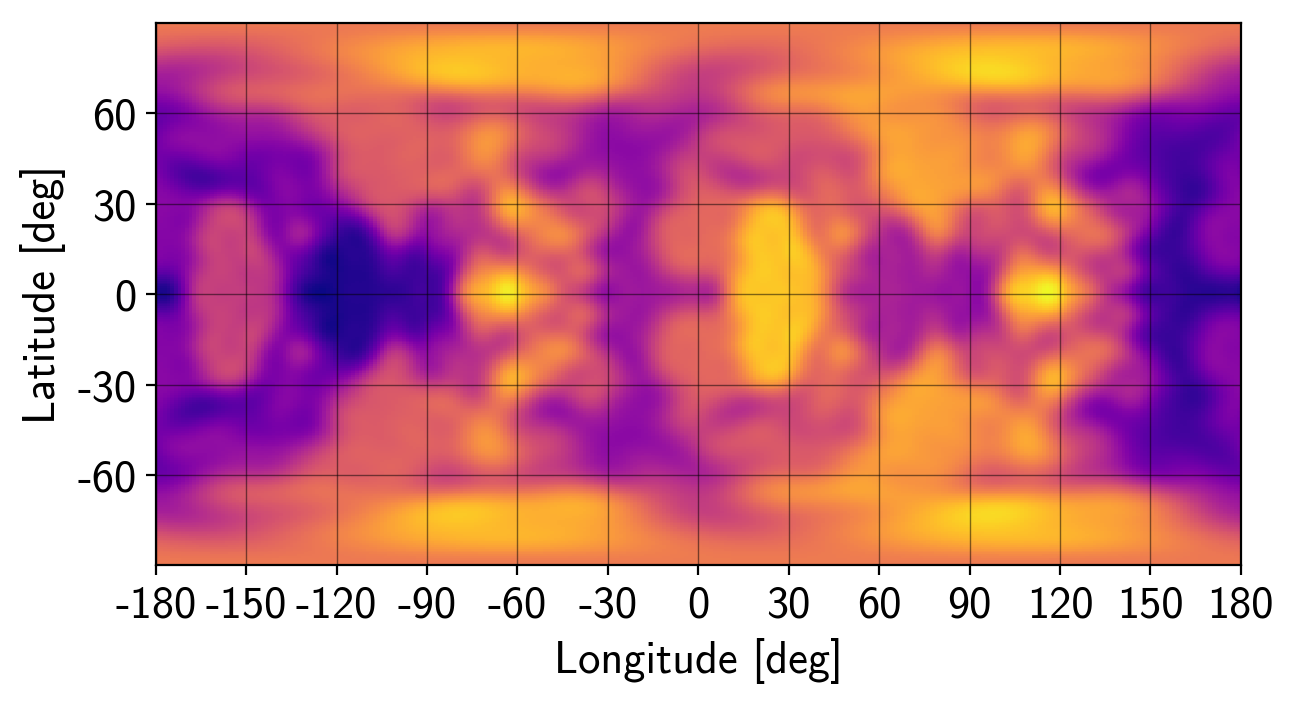

In [32]:
map2.show(projection="rect")

Compiling `flux`... Done.


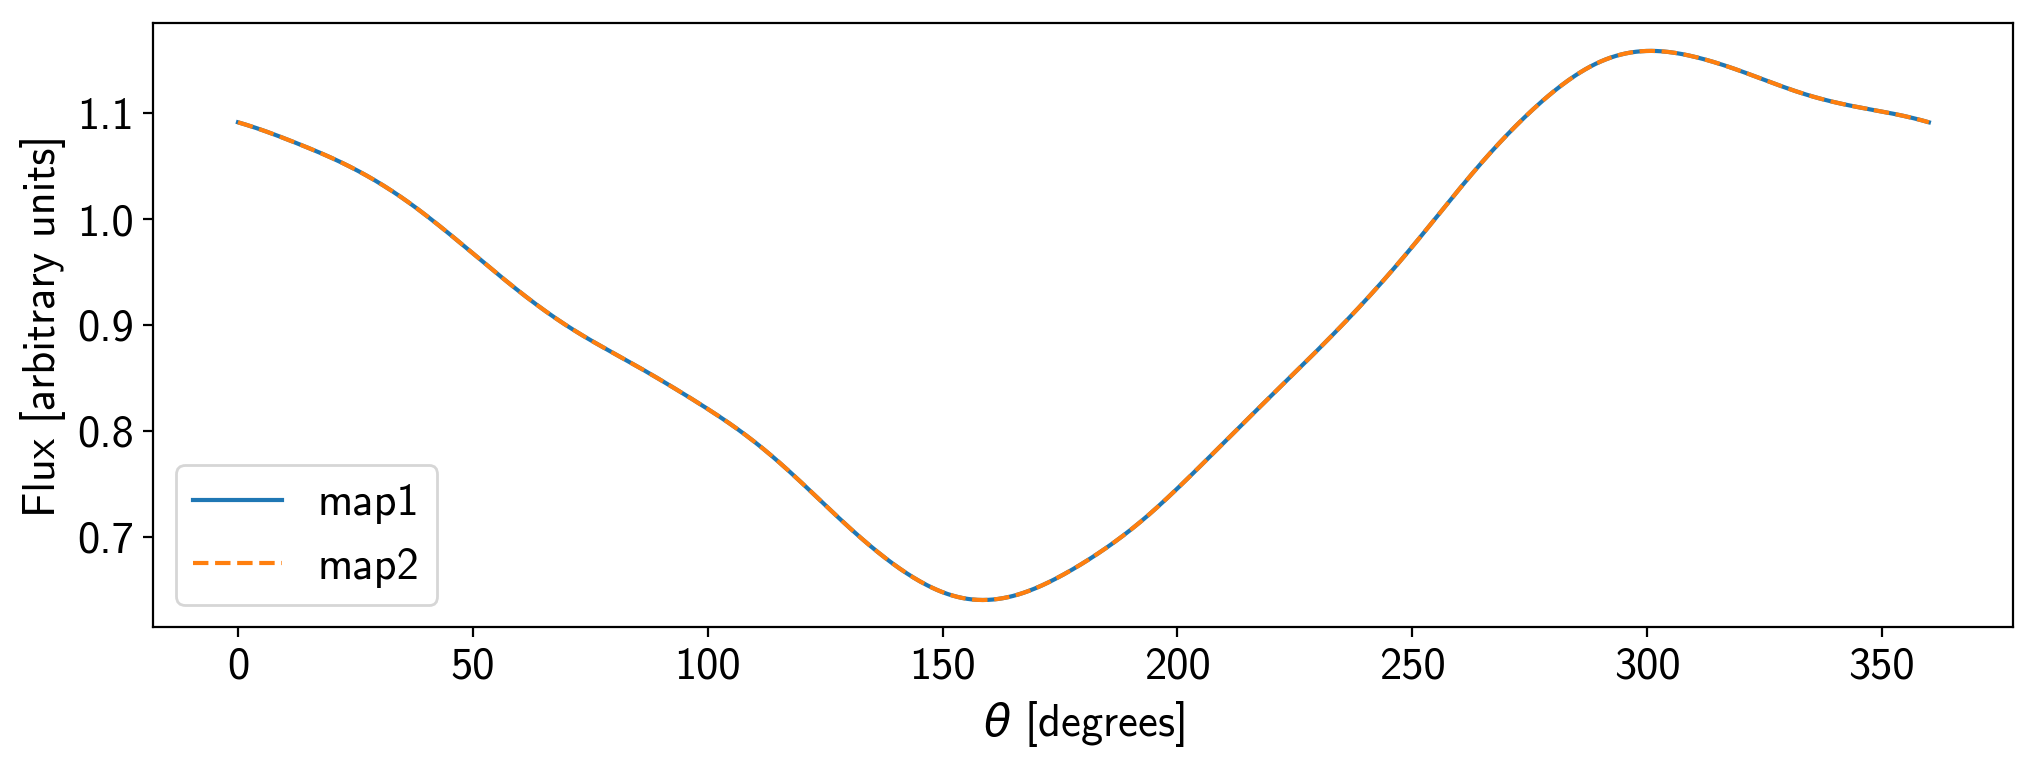

In [33]:
flux2 = map2.flux(theta=theta)
plt.plot(theta, flux1, label="map1")
plt.plot(theta, flux2, "--", label="map2")
plt.legend()
plt.xlabel(r"$\theta$ [degrees]")
plt.ylabel("Flux [arbitrary units]");

Here's what the two maps look like side-by-side:

In [34]:
from ipywidgets import widgets
out1 = widgets.Output(layout={})
out2 = widgets.Output(layout={})

with out1:
    map1.show(theta=np.linspace(0, 360, 50, endpoint=False))

with out2:
    map2.show(theta=np.linspace(0, 360, 50, endpoint=False))
    
HBox([out1, out2])